# EDA for Merged DataSet

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("merged.csv")

In [4]:
# Step 3: Data Cleaning

# Part A: Dropping the 'Unnamed: 0' Column

# Check if 'Unnamed: 0' exists in the DataFrame columns
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)
    print("Dropped the 'Unnamed: 0' column.")
else:
    print("No 'Unnamed: 0' column found in the DataFrame.")

# Verify that the column has been dropped
print("\nCurrent DataFrame Columns:")
print(df.columns.tolist())

Dropped the 'Unnamed: 0' column.

Current DataFrame Columns:
['Date', 'Stock Name', 'Stock Ticker', 'Market Price', 'PE Ratio', 'PB Ratio', 'DE Ratio', 'ROE', 'Volume', 'Stock Style', 'Sector', 'stockname', 'sentiment_score']


In [5]:
df.isnull().sum()

Date               0
Stock Name         0
Stock Ticker       0
Market Price       0
PE Ratio           0
PB Ratio           0
DE Ratio           0
ROE                0
Volume             0
Stock Style        0
Sector             0
stockname          0
sentiment_score    0
dtype: int64

## Sentiment Score vs. Market Price Scatter Plot

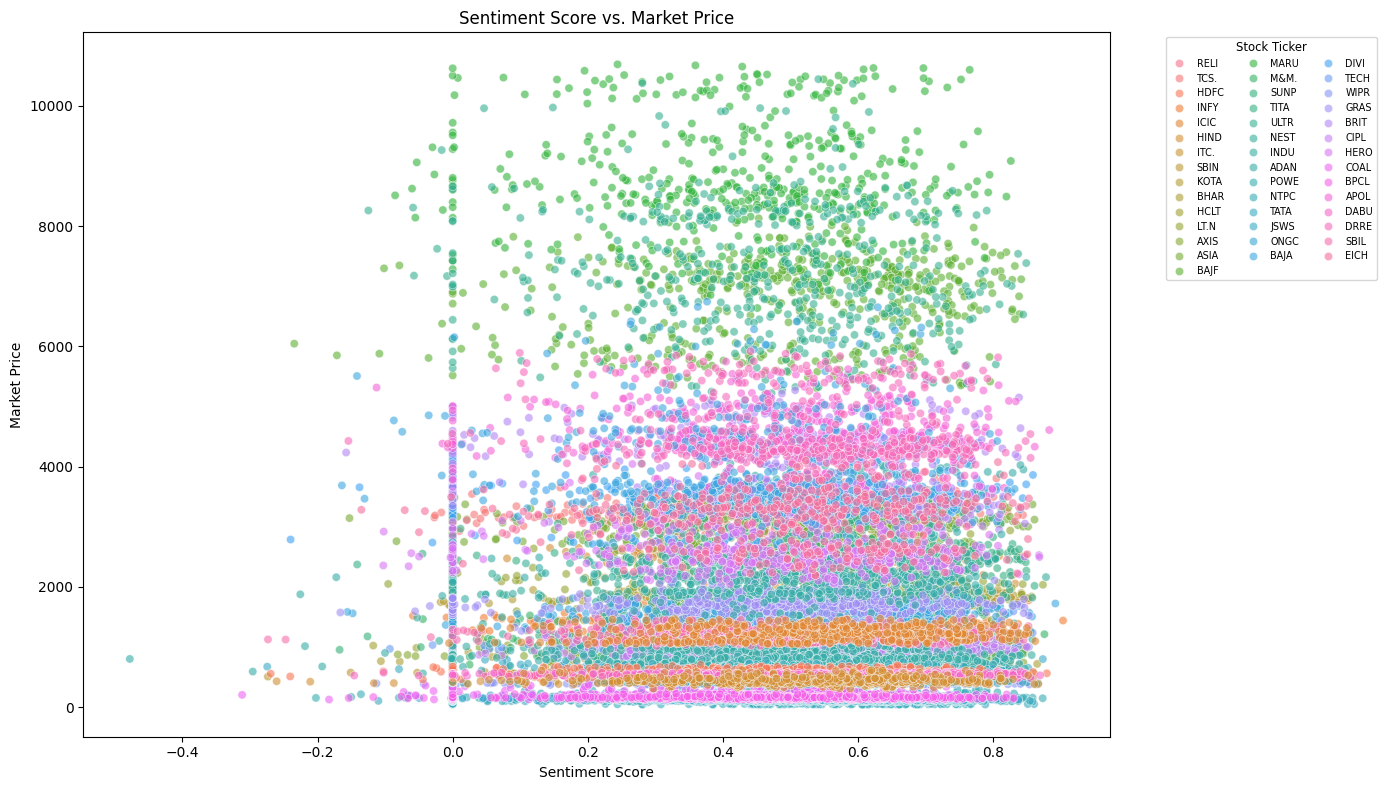

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Abbreviate stock tickers if necessary
abbreviation_mapping = {ticker: ticker[:4] for ticker in df['Stock Ticker'].unique()}
df['Ticker Abbr'] = df['Stock Ticker'].map(abbreviation_mapping)

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='sentiment_score', y='Market Price', hue='Ticker Abbr', alpha=0.6)

plt.title('Sentiment Score vs. Market Price')
plt.xlabel('Sentiment Score')
plt.ylabel('Market Price')

# Create the legend with multiple columns and smaller font
plt.legend(title='Stock Ticker', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3, fontsize='x-small', title_fontsize='small')

plt.tight_layout()
plt.show()

## Time Series Analysis of Market Price and Sentiment Score

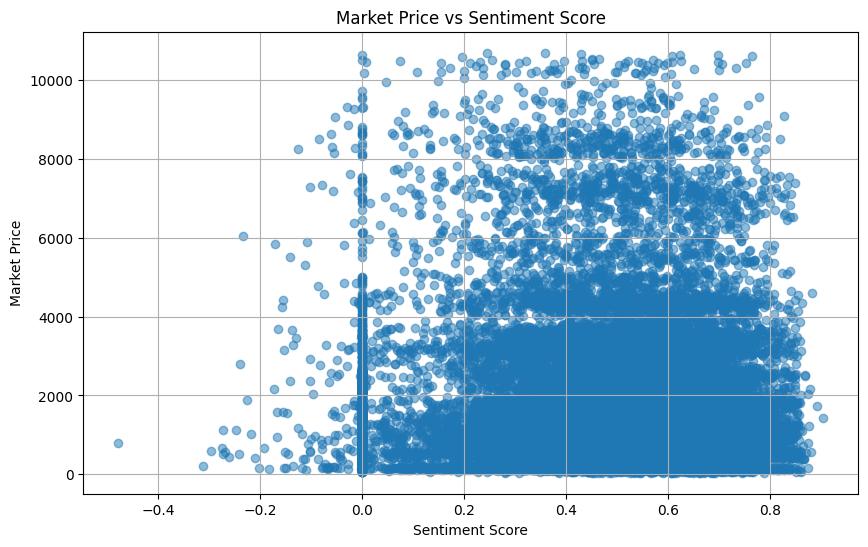

In [8]:
data=df
# 1. Market Price vs Sentiment Score
plt.figure(figsize=(10, 6))
plt.scatter(data['sentiment_score'], data['Market Price'], alpha=0.5)
plt.title('Market Price vs Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Market Price')
plt.grid(True)
plt.show()

How to Interpret the Graph:

This scatter plot helps visualize whether sentiment scores are correlated with stock market prices. A clear pattern would indicate a potential relationship.
Insights:

There is no strong, immediate correlation between sentiment scores and market prices in this plot. This suggests that sentiment changes may not immediately or directly affect stock prices.
However, manipulative behavior may cause delayed effects or occur only during specific sentiment spikes.
Relevance to Project:

This graph indicates that stock prices may not react directly to sentiment changes. However, when significant sentiment spikes occur, delayed price movements may still be a sign of market manipulation. The absence of an immediate relationship suggests the need for further analysis to detect more subtle patterns.


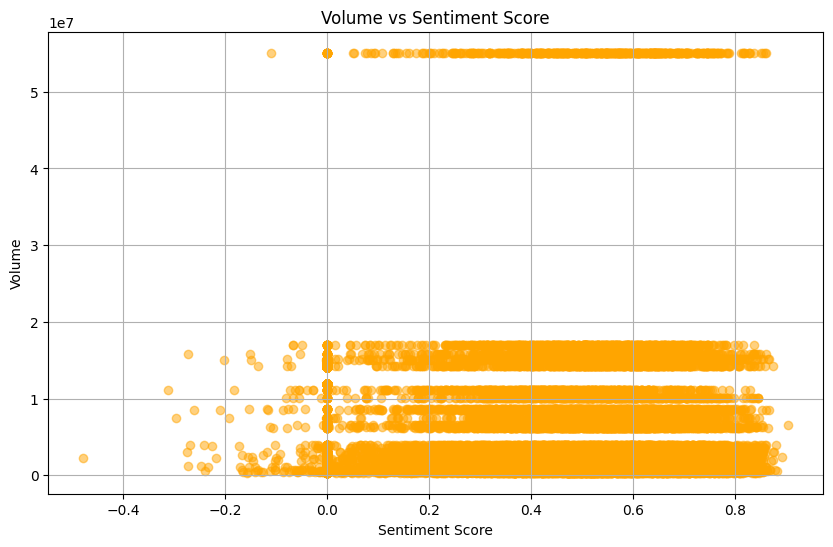

In [9]:
# 2. Volume vs Sentiment Score
plt.figure(figsize=(10, 6))
plt.scatter(data['sentiment_score'], data['Volume'], alpha=0.5, color='orange')
plt.title('Volume vs Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

How to Interpret the Graph:

This scatter plot shows how trading volume correlates with sentiment score. Unusual spikes in trading volume with extreme sentiment scores could suggest manipulation.
Insights:

Like the previous graph, there isn’t a clear relationship between sentiment score and volume. However, during instances of manipulation, trading volumes might spike alongside extreme sentiment shifts.
Spikes in trading volume could indicate more trades driven by manipulated market sentiment.
Relevance to Project:

Volume is a key indicator of market activity. When combined with sentiment analysis, it becomes possible to detect periods of unusually high trading volume driven by extreme sentiment, which is a common feature of market manipulation schemes.

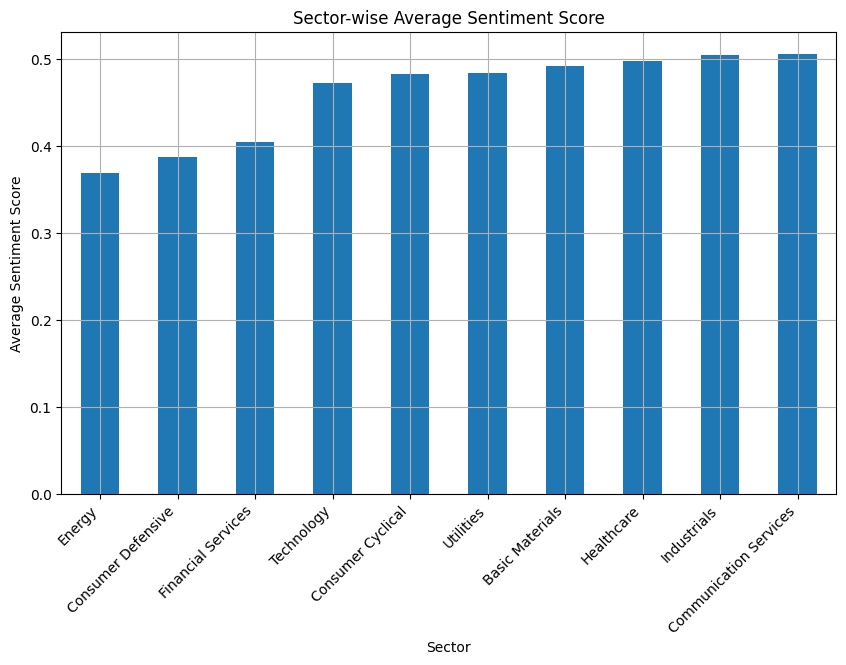

In [10]:
# 3. Sector-wise Sentiment Score Distribution
plt.figure(figsize=(10, 6))
sector_sentiment = data.groupby('Sector')['sentiment_score'].mean().sort_values()
sector_sentiment.plot(kind='bar')
plt.title('Sector-wise Average Sentiment Score')
plt.xlabel('Sector')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

How to Interpret the Graph:

This bar plot shows how average sentiment scores differ across sectors. It helps identify which sectors might be more sensitive to sentiment changes and thus more vulnerable to manipulation.
Insights:

Certain sectors show higher average sentiment scores, which could imply that these sectors are more influenced by public sentiment.
Sectors with extremely high or low sentiment scores are potentially more prone to manipulation efforts, especially in industries where sentiment plays a key role in stock prices.
Relevance to Project:

This graph helps narrow the focus to sectors that may be more vulnerable to sentiment-driven manipulation. By identifying sectors with high sentiment scores, you can monitor those sectors more closely for signs of potential manipulation.

C:\Users\Dell\AppData\Local\Temp\ipykernel_5844\1216723344.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


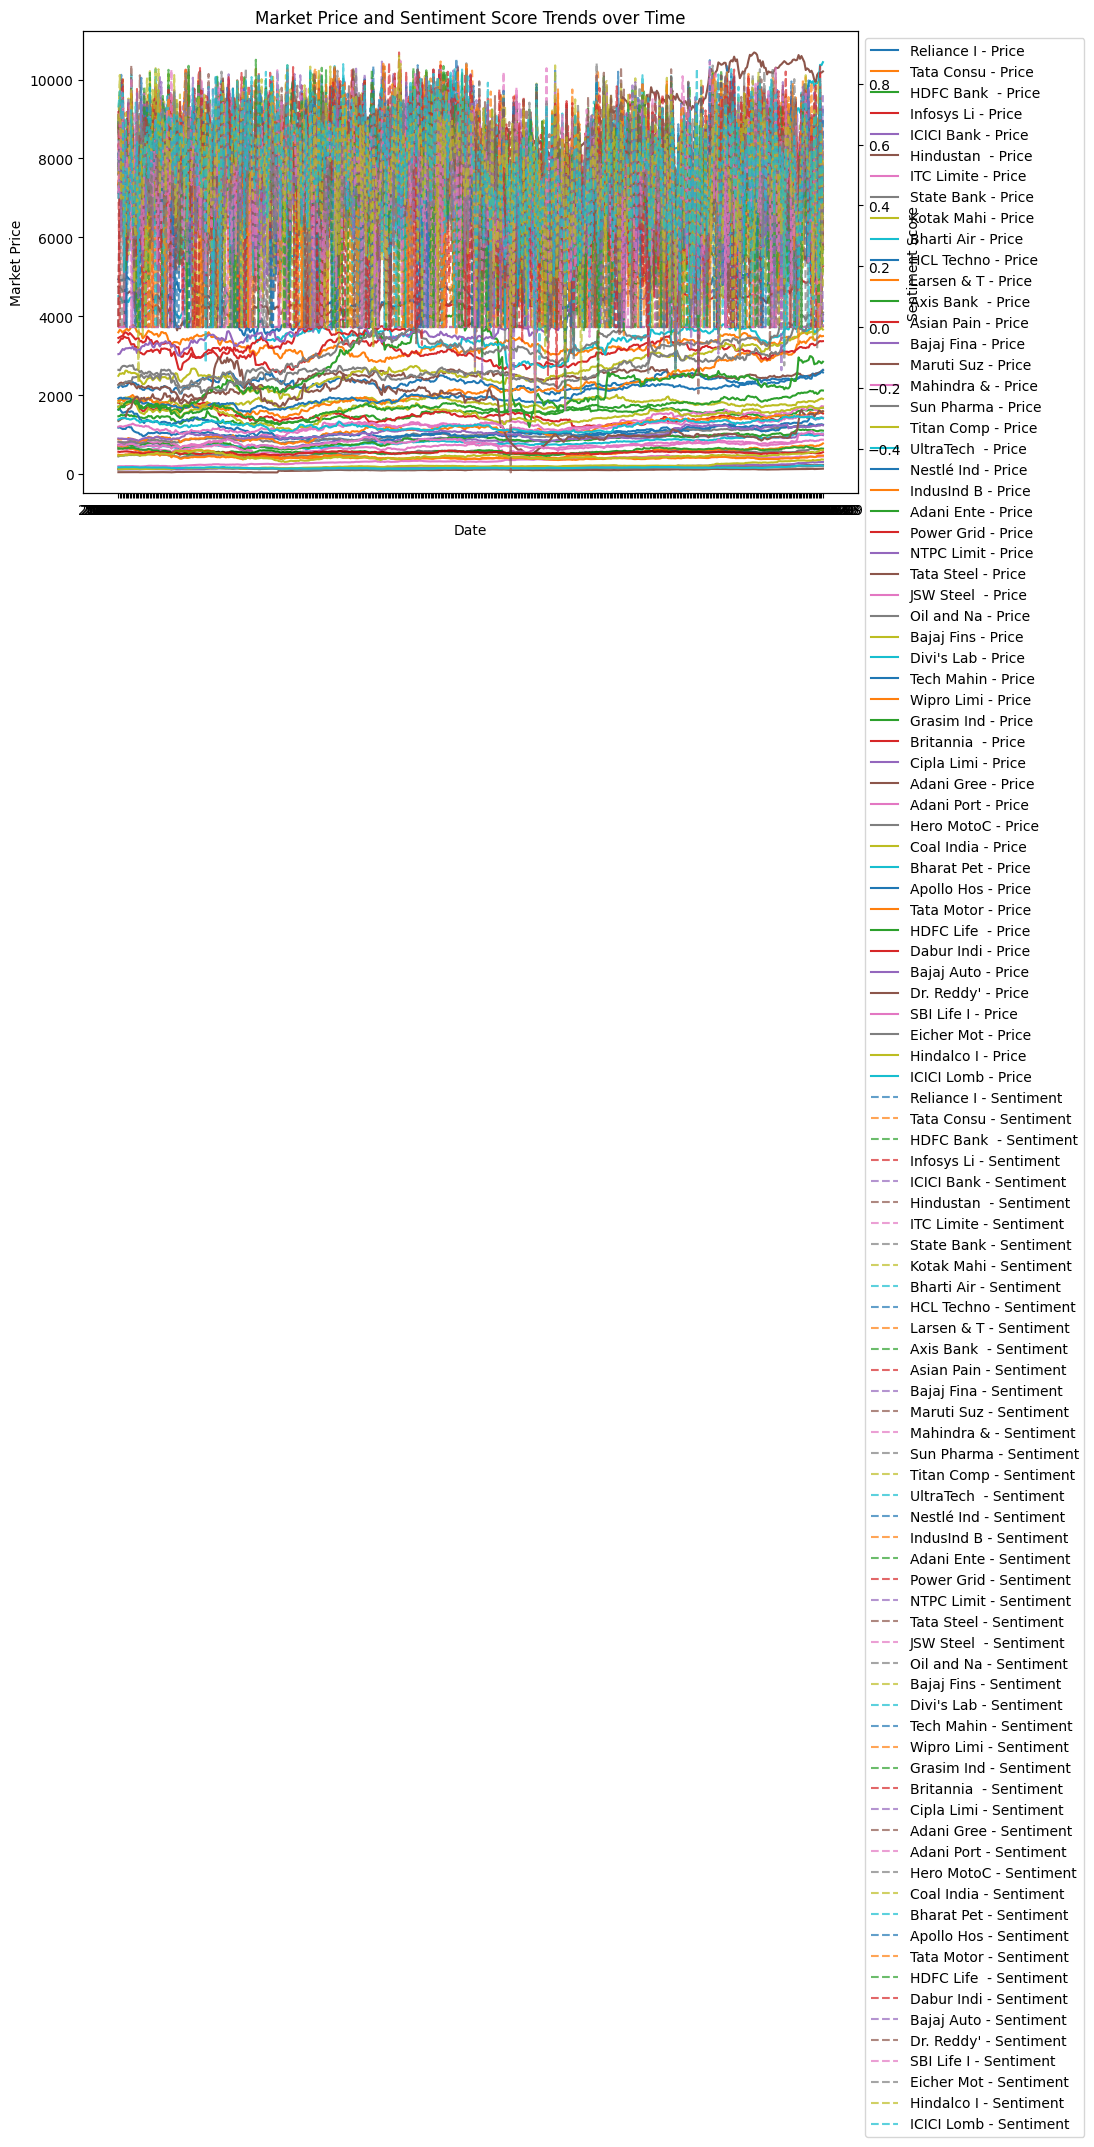

In [13]:
import matplotlib.pyplot as plt

# Create a figure and axis for the price and sentiment overlay
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the market price trends
for stock in data['Stock Name'].unique():
    stock_data = data[data['Stock Name'] == stock]
    
    # Plot the market price on the primary y-axis
    ax1.plot(stock_data['Date'], stock_data['Market Price'], label=f"{stock[:10]} - Price")

# Set labels and title for the primary axis (market price)
ax1.set_xlabel('Date')
ax1.set_ylabel('Market Price')
ax1.set_title('Market Price and Sentiment Score Trends over Time')

# Create a secondary y-axis for the sentiment score
ax2 = ax1.twinx()
for stock in data['Stock Name'].unique():
    stock_data = data[data['Stock Name'] == stock]
    
    # Plot the sentiment score on the secondary y-axis
    ax2.plot(stock_data['Date'], stock_data['sentiment_score'], linestyle='--', label=f"{stock[:10]} - Sentiment", alpha=0.7)

# Set the y-label for the sentiment score
ax2.set_ylabel('Sentiment Score')

# Combine both legends from the primary and secondary axis
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1, 1))

# Improve layout and apply grid
plt.xticks(rotation=45)
fig.tight_layout()

plt.show()

How to Interpret the Graph:

This plot shows both market price and sentiment score trends for different stocks over time. The aim is to identify any correlation between sentiment spikes and subsequent changes in stock prices.
Insights:

Overlaying sentiment and price movements reveals that certain sentiment spikes align with changes in stock prices. This could indicate attempts to manipulate market prices through coordinated sentiment shifts.
Sudden jumps in sentiment scores followed by price changes could be signs of market manipulation.
Relevance to Project:

This graph provides a more direct way of identifying potential manipulation by comparing price trends with sentiment shifts. Sentiment manipulation often leads to price fluctuations, and this visualization makes it easier to detect these correlations.

C:\Users\Dell\AppData\Local\Temp\ipykernel_5844\3962311360.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


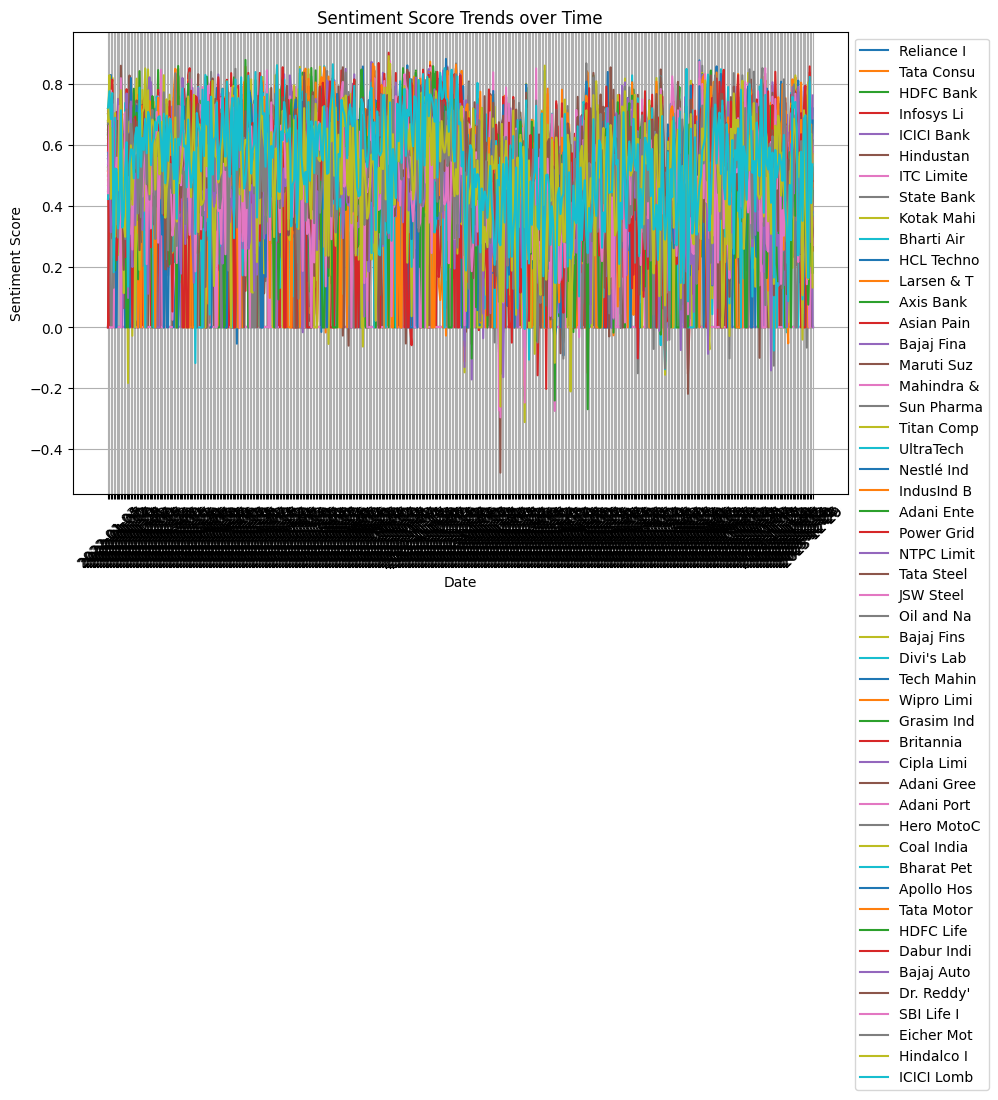

In [12]:
# 5. Sentiment Score Trends over Time
plt.figure(figsize=(10, 6))
for stock in data['Stock Name'].unique():
    stock_data = data[data['Stock Name'] == stock]
    plt.plot(stock_data['Date'], stock_data['sentiment_score'], label=stock[:10])  # Truncate names for better display
plt.title('Sentiment Score Trends over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside to avoid clutter
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

How to Interpret the Graph:

This plot tracks the sentiment score trends over time for each stock, helping us identify periods where sentiment changes drastically.
Insights:

Stocks that exhibit sharp or sudden sentiment changes over time could be subject to manipulation. These spikes often correspond to coordinated attempts to influence market perception.
Periods of high sentiment volatility should be closely monitored to detect potential manipulation efforts.
Relevance to Project:

Sentiment trends are key to identifying market manipulation, especially when public perception is deliberately altered through false or exaggerated information. This graph helps detect these patterns and track sentiment-driven manipulation.


In [ ]:
# Dropping unnecessary columns: 'Unnamed: 0', 'Stock Ticker', and 'stockname'
cleaned_data = data.drop(columns=['Unnamed: 0', 'Stock Ticker', 'stockname'])

# Save the cleaned dataset to a new CSV file
cleaned_data.to_csv('clean_merge.csv', index=False)